cnn_221026

## CNN 알고리즘
- 딥러닝의 꽃
- 다층 신경망의 기본적인 계산 방식은 각 1개씩만 계산, 반면에 CNN은 필터(커널)를 활용하여 계산
- 파급효과
  + (은행) 손글씨 판별기를 만듬 / 상업화 성공
  + 다양한 아류(개선된) 논문들이 쏟아져 나오기 시작
  + 1998년도, LeNet
  + 2012년도, AlexNet
  + ... VGGNet, GoogleNet
  + 2015년도 ResNet의 성능이 사람을 능가하기 시작 --> 영상인식 알고리즘 발전에 도움을 주기 시작

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

train_input.shape, train_target.shape, test_input.shape, test_target.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- 기존 신경망 1차원 배열로 재정렬
- 합성곱 신경망에서는 3차원 배열을 유지해야 함.
  + 흑백이미지인 경우도 3차원 배열로 정리

In [2]:
train_scaled = train_input.reshape(-1, 28,28,1) /255.0
train_scaled.shape

(60000, 28, 28, 1)

## 데이터셋 분리

In [3]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)
train_scaled.shape, val_scaled.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

## 합성곱 신경망 만들기
- 기본 코드의 컨셉은 다층 신경망 구현할 때와 똑같음

In [6]:
model = keras.Sequential()    # 32개의 필터, 3 X 3
# 3차원
model.add(keras.layers.Conv2D(32,kernel_size = 3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size = 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

#1차원
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

원본 이미지
-- Cov2D ... MaxPooling : 표본 샘플이 만들어짐

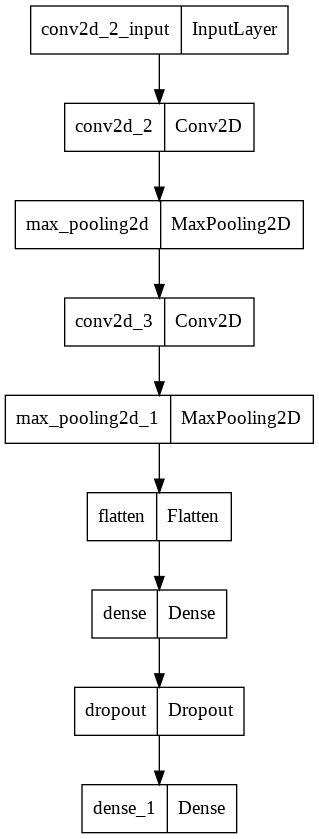

In [7]:
keras.utils.plot_model(model)

## 모형 훈련

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

## 모델 저장 
- 파이썬에서 모델을 저장한다. 그러나 자바에서는 쉽게 불러올 수 없다.
- 별도의 작업이 필요하다
  + API 구성, Embeded 형태로 코드 구현 등.

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=50, validation_data= (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 68s 44ms/step - loss: 0.5258 - accuracy: 0.8108 - val_loss: 0.3345 - val_accuracy: 0.8743
Epoch 2/50
1500/1500 [==============================] - 67s 44ms/step - loss: 0.3514 - accuracy: 0.8741 - val_loss: 0.2832 - val_accuracy: 0.8940
Epoch 3/50
1500/1500 [==============================] - 68s 46ms/step - loss: 0.3015 - accuracy: 0.8900 - val_loss: 0.2791 - val_accuracy: 0.8975
Epoch 4/50
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2682 - accuracy: 0.9026 - val_loss: 0.2362 - val_accuracy: 0.9131
Epoch 5/50
1500/1500 [==============================] - 68s 46ms/step - loss: 0.2450 - accuracy: 0.9105 - val_loss: 0.2318 - val_accuracy: 0.9126
Epoch 6/50
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2236 - accuracy: 0.9174 - val_loss: 0.2211 - val_accuracy: 0.9193
Epoch 7/50
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2057 - accuracy: 0.9249 - val_loss: 0.2325 -

## 모형 평가 그래프를 작성한다.

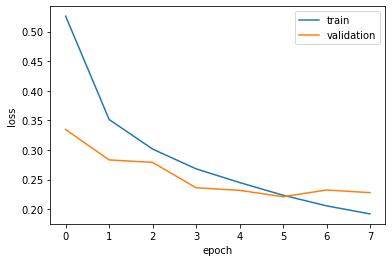

In [11]:
import matplotlib.pyplot as plt

def eva_graph(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','validation'])
  plt.show()

eva_graph(history)

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 15ms/step - loss: 0.2211 - accuracy: 0.9193


[0.22106771171092987, 0.9193333387374878]

## 저장된 모델을 불러온다.

In [13]:
model2 = keras.models.load_model('/content/best-cnn-model.h5')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [14]:
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 14ms/step - loss: 0.2211 - accuracy: 0.9193


[0.22106771171092987, 0.9193333387374878]